# DIFFERENTIAL CONTROL

# Is rateOf implemened correctly?

In [1]:
import controlSBML as ctl

import control
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tellurium as te
ctl.__version__

'1.1.03'

# Evaluate rateOf

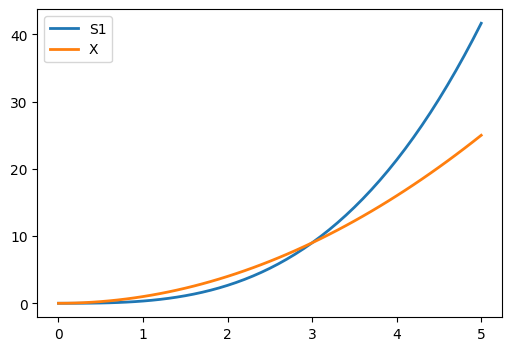

In [2]:
MODEL = """
-> S1; time*time
X := rateOf(S1)
"""
rr = te.loada(MODEL)
rr.simulate(selections=["time", "S1", "X"])
rr.plot()

# Analysis of Linear Model

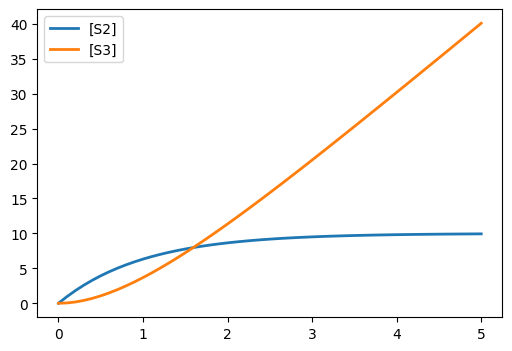

In [3]:
LINEAR_MODEL = """
model *main()
$S1 -> S2; k1*S1
S2 -> S3; k2*S2

k1 = 1
k2 = 1
S1 =10
s2 = 10
end
"""
rr = te.loada(LINEAR_MODEL)
rr.simulate()
rr.plot()

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 17.66it/s]


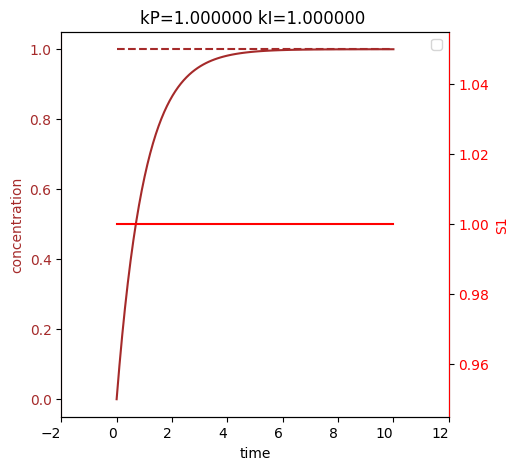

In [4]:
CTLSB_LINEAR = ctl.ControlSBML(LINEAR_MODEL, input_name="S1", output_name="S2")
result = CTLSB_LINEAR.plotDesign(kI_spec=1, kP_spec=1)

In [5]:
result.antimony_builder

// Created by libAntimony v2.13.2
model *main()

  // Compartments and Species:
  species $S1, S2, S3;

  // Reactions:
  _J0: $S1 -> S2; k1*S1;
  _J1: S2 -> S3; k2*S2;

  // Species initializations:
  S1 = 10;
  S2 = ;
  S3 = ;

  // Variable initializations:
  k1 = 1;
  k2 = 1;
  s2 = 10;

  // Other declarations:
  const k1, k2, s2;

//vvvvvvvvvAdded by ControlSBMLvvvvvvvvvv

// Closed loop: S1 -> S2

// Make sinusoid: amplitude=0, frequency=20
noise_S1_S2_ot := 0.000000*sin(2*pi*20.000000*time)

// Make sinusoid: amplitude=0, frequency=20
disturbance_S1_S2_ot := 0.000000*sin(2*pi*20.000000*time)

// Filter: kF=None
filter_S1_S2_ot := filter_S1_S2_in

// PI Controller: kP=1.0, kI=1.0
controller_integral_error_S1_S2' = controller_S1_S2_in
controller_integral_error_S1_S2 = 0
controller_S1_S2_ot := 1.000000*controller_S1_S2_in+ 1.000000*controller_integral_error_S1_S2
control_error_S1_S2_ot := 1 - filter_S1_S2_ot

// Connect the elements of the closed loop
controller_S1_S2_in := contro

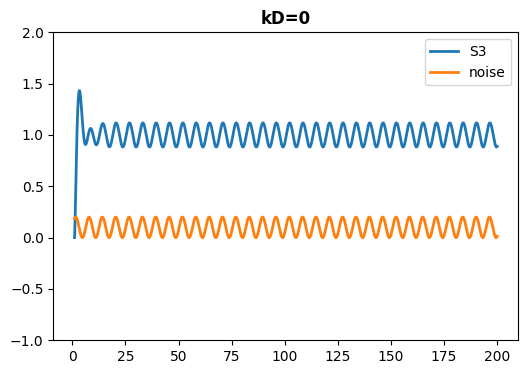

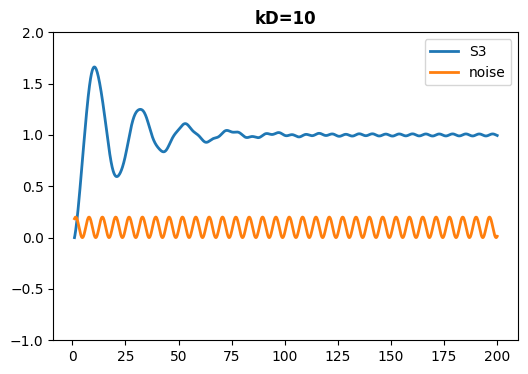

In [16]:
PID_CONTROL = """
// Created by libAntimony v2.13.2
model *main()

  // Compartments and Species:
  species $S1, S2, S3;

  // Reactions:
  _J0: $S1 -> S2; k1*S1;
  _J1: S2 -> S3; k2*S2;
  _J2: S3 -> S2; k3*S3

  // Species initializations:
  S1 = 10;
  S2 = ;
  S3 = ;

  // Variable initializations:
  k1 = 2;
  k2 = 3;
  s2 = 10;
  k3 = 4

// Closed loop: S1 -> S3

// PI Controller: kP=1.0, kI=1.0
kP_S1_S3 = 1.0
kI_S1_S3 = 1.0
kD_S1_S3 = 1.0
setpoint_S1_S3 = 1

control_error_S1_S3 := setpoint_S1_S3 - S3
integral_control_error_S1_S3' = control_error_S1_S3
integral_control_error_S1_S3 = 0
derivative_control_error_S1_S3 := -rateOf(S3)
noise := 0.1*sin(time) + 0.1

# PID with noise
S1 := kP_S1_S3*control_error_S1_S3 + kI_S1_S3*integral_control_error_S1_S3 + kD_S1_S3*derivative_control_error_S1_S3 + noise
end
"""
ylim = [-1, 2]
rr = te.loada(PID_CONTROL)
rr["kD_S1_S3"] = 0
rr.simulate(1, 200, 2000, selections=["time", "S3", "noise"])
rr.plot(title="kD=0", ylim=ylim)
rr["kD_S1_S3"] = 10
rr.reset()
rr.simulate(1, 200, 2000, selections=["time", "S3", "noise"])
rr.plot(title="kD=10", ylim=ylim)

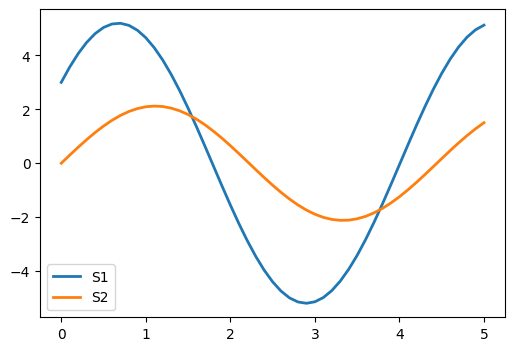

In [7]:
# A simpler example

EXPANDED_LINEAR_MODEL = """
// Created by libAntimony v2.13.2

  // Reactions:
  _J0: $S1 -> S2; k1*S1;
  _J1: S2 -> S3; k2*S2;

  // Species initializations:
  S1 = 10;
  S2 = 0;
  S3 = 0;

  // Variable initializations:
  k1 = 1;
  k2 = 2;
  kP = 1
  kD = 1
  setpoint = 3

  err := setpoint - S3
  $S1 := kP*err + kD*rateOf(S3)
"""
rr = te.loada(EXPANDED_LINEAR_MODEL)
rr.simulate(selections=["time", "S1", "S2"])
rr.plot()